## Part 1: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [3]:
data = pd.read_csv('autos.csv', usecols=['model','brand','kilometer','yearOfRegistration','price'])
data['avg_running_per_year'] = pd.Series(np.array(data['kilometer'].tolist())/(np.abs(np.array(data['yearOfRegistration'].tolist()) - 2020)))
data.dropna(inplace=True)
data.head()

,price,yearOfRegistration,model,kilometer,brand,avg_running_per_year
0,480,1993,golf,150000,volkswagen,5555.555556
2,9800,2004,grand,125000,jeep,7812.500000
3,1500,2001,golf,150000,volkswagen,7894.736842
4,3600,2008,fabia,90000,skoda,7500.000000
5,650,1995,3er,150000,bmw,6000.000000


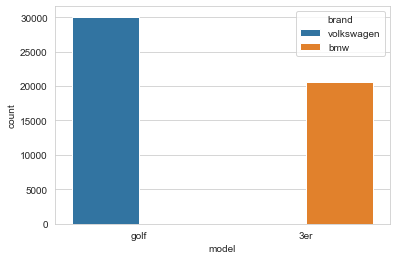

In [4]:
data = data[data['model'].isin(['golf','3er'])]
sns.countplot(x='model', hue='brand', data=data)

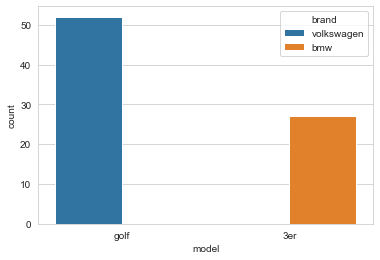

In [5]:
rn = 72
m = 50 + (rn%43)
data = data.sample(m)
sns.countplot(x='model', hue='brand', data=data)

In [6]:
print("[INFO]: Training Model with " + str(m) + " total cases.")

[INFO]: Training Model with 79 total cases.


In [7]:
train = data.iloc[0:(int(0.8*m))]
test = data.iloc[(int(0.8*m)):]
print("[INFO]: Training Size: " + str(len(train)))
print("[INFO]: Testing Size: " + str(len(test)))

[INFO]: Training Size: 63
[INFO]: Testing Size: 16


## Part 2: Training the Model

#### 2.1 Calculate Mean and Variance

In [8]:
def mean(values):
    return sum(values)/len(values)

In [9]:
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

In [10]:
X = train['avg_running_per_year'].tolist()
Y = train['price'].tolist()
x_mean, y_mean = mean(X), mean(Y)
x_var, y_var = variance(X, x_mean), variance(Y, y_mean)
print('X stats: mean=%.3f variance=%.3f' % (x_mean, x_var))
print('Y stats: mean=%.3f variance=%.3f' % (y_mean, y_var))

X stats: mean=7460.978 variance=486371527.575
Y stats: mean=4936.159 variance=1615891164.413


#### 2.2 Calculate Covariance

In [11]:
def covariance(X, x_mean, Y, y_mean):
    covar = 0.0
    for i in range(len(X)):
        covar += (X[i] - x_mean) * (Y[i] - y_mean)
    return covar

In [12]:
covar = covariance(X, x_mean, Y, y_mean)
print('Covariance: %.3f' % (covar))

Covariance: 99267017.377


#### 2.3 Calculate Coefficients

In [13]:
def coefficients(covar, x_var, x_mean, y_mean):
    b1 = covar / x_var
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

In [14]:
b0, b1 = coefficients(covar, x_var, x_mean, y_mean)
print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))

Coefficients: B0=3413.395, B1=0.204


#### 2.4 Simple Linear Regression

In [15]:
def simple_linear_regression(x_test, b0, b1):
    predictions = list()
    for row in x_test:
        yhat = b0 + b1 * row
        predictions.append(yhat)
    return predictions

In [16]:
X_test, Y_test = test['avg_running_per_year'].tolist(), test['price'].tolist()
predictions = simple_linear_regression(X_test, b0, b1)

#### 2.5 Evaluate Error

In [17]:
from math import sqrt
def get_error(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return mean_error, sqrt(mean_error)

In [18]:
mse, rmse = get_error(Y_test, predictions)
print('MSE: %.3f' % (mse))
print('RMSE: %.3f' % (rmse))

MSE: 16135854.507
RMSE: 4016.946


#### 2.6 Visualize the result

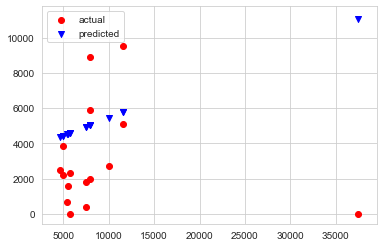

In [19]:
fig,ax = plt.subplots()
ax.scatter(X_test, Y_test, marker='o', c='red', label='actual')
ax.scatter(X_test, predictions, marker='v', c='blue', label='predicted')
plt.legend()